In [103]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Read the DataFrame:
df = pd.read_excel(r'C:\Users\diana\OneDrive\Bureau\Labs\marketing_customer_analysis.xlsx')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [105]:
# Check the summary of a DataFrame:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [106]:
# Standardize the header names:
df.columns = df.columns.str.lower()
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [107]:
# Select the numerical columns:
df_numerical=df.select_dtypes(include='number')
df_numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [108]:
# Select the categorical columns:
df_categorical=df.select_dtypes(exclude='number')
df_categorical

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [109]:
# Check and deal with NaN values:
df.isnull().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [110]:
# Drop the dublicates:
df = df.drop_duplicates(keep='first')
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [111]:
# Extract the months from the dataset and store in a separate column:
df['effective to date']=pd.to_datetime(df['effective to date'])
df['month'] = df['effective to date'].dt.month
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [112]:
# Retain only the data that corresponds to the first quarter of the year: 
first_quarter_data = df[(df['month'] >= 1) & (df['month'] <= 3)]
first_quarter_data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [113]:
# Check the Nan values:
df_nan=df.isna().sum()
df_nan

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
month                            0
dtype: int64

In [114]:
# Round the values to two decimal places:
df['customer lifetime value'] = df['customer lifetime value'].round(2)
df['income'] = df['income'].round(2)
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [115]:
# Summary statistics for numerical data in the DataFrame:
df_num=df_numerical
df_num.describe().round(2)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [116]:
# Swap the rows with the columns:
summary=df_num.describe().T
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
monthly premium auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
months since last claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
months since policy inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
number of open complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
number of policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
total claim amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


In [117]:
# Show the interquartile range for each numerical column:
summary['igr']=summary['75%']-summary['25%']
summary=summary.apply(lambda x: round(x,2))
summary

,count,mean,std,min,25%,50%,75%,max,igr
customer lifetime value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38,4967.92
income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00,62320.00
monthly premium auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00,41.00
months since last claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00,17.00
months since policy inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00,47.00
number of open complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00
number of policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00,3.00
total claim amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24,275.26


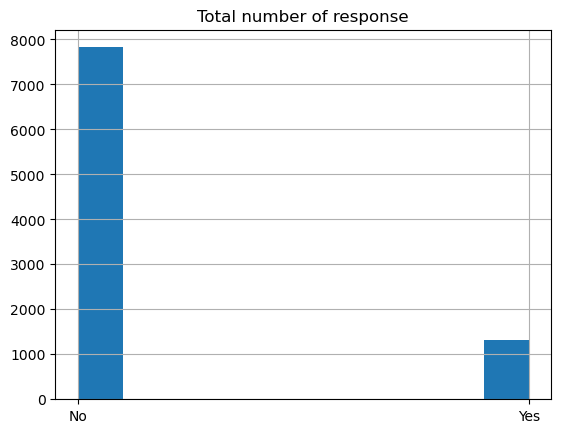

In [118]:
# Show a plot of the total number of responses:
df['response'].hist()
# Add the title:
plt.title('Total number of response')
# Show the graph:
plt.show()

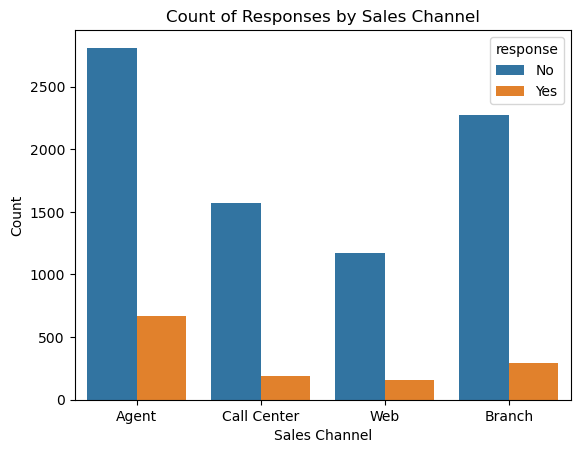

In [119]:
# Show a plot of the response rate by the sales channel:
sns.countplot(x="sales channel", hue="response", data=df)

# Add the title et the labels:
plt.title('Count of Responses by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

# Show the grath:
plt.show()

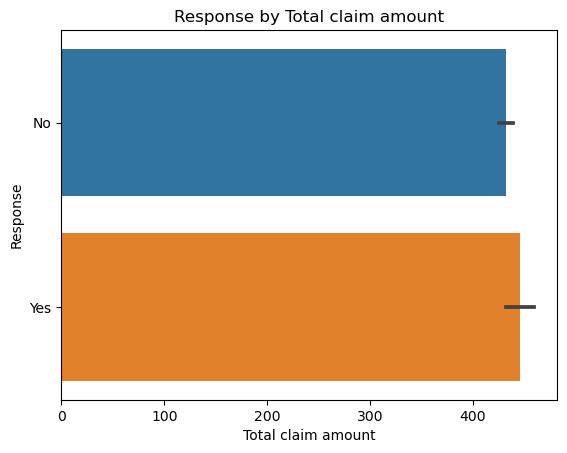

In [120]:
# Show a plot of the response rate by the total claim amount:
sns.barplot(x=df["total claim amount"], y=df["response"])

# Add the title et the labels:
plt.title('Response by Total claim amount')
plt.xlabel('Total claim amount')
plt.ylabel('Response')

# Show the graph:
plt.show()

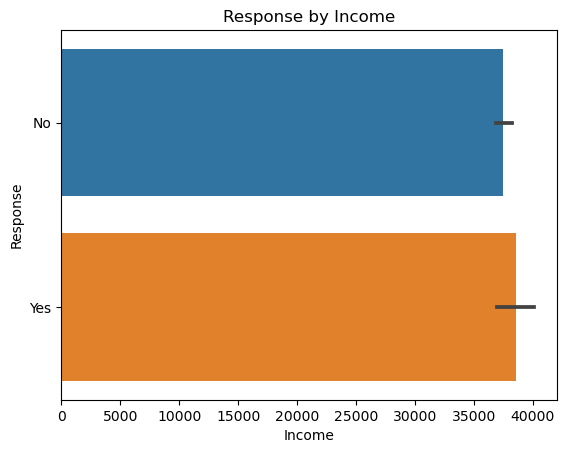

In [121]:
# Show a plot of the response rate by income:
sns.barplot(x=df["income"], y=df["response"])

# Add the title et the labels:
plt.title('Response by Income')
plt.xlabel('Income')
plt.ylabel('Response')

# Show the graph:
plt.show()

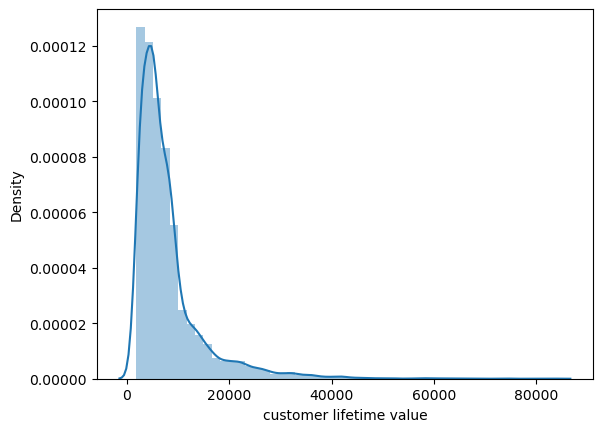

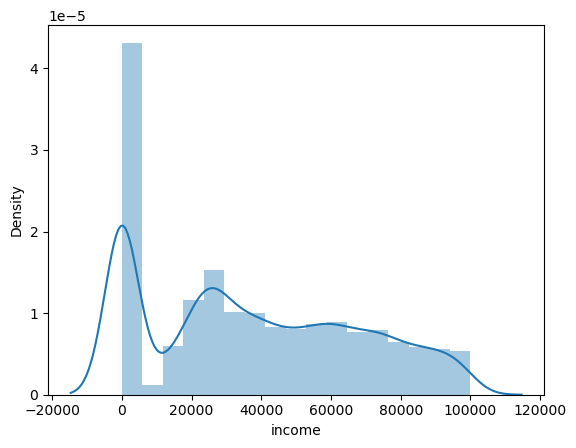

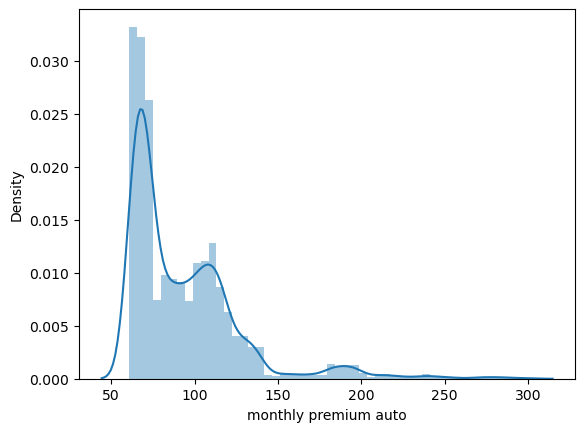

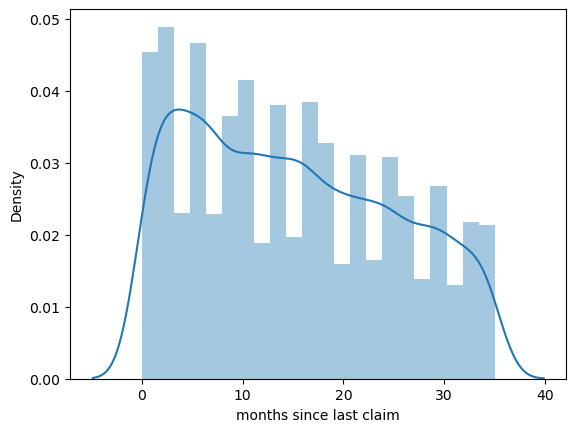

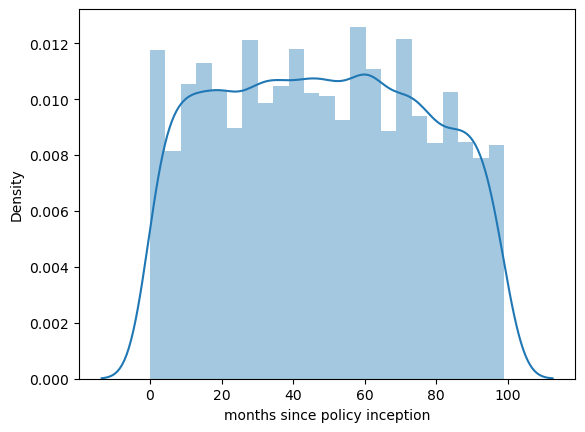

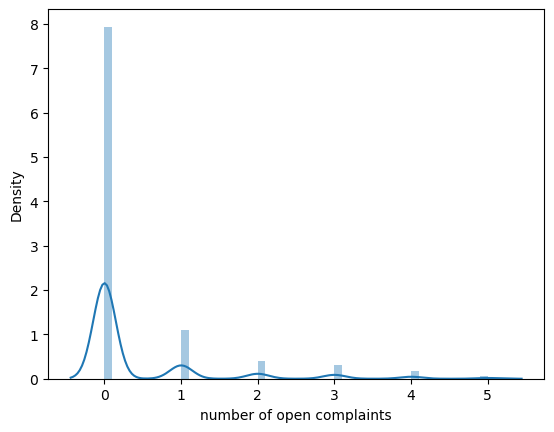

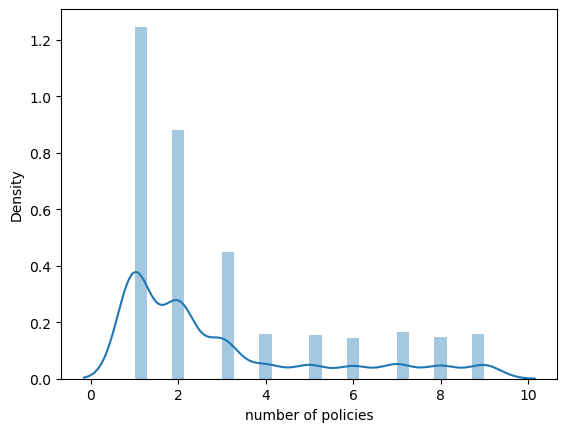

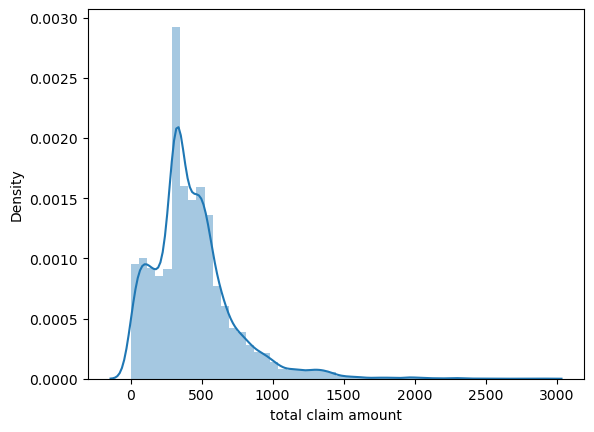

In [122]:
# Check the distribution on the numerical columns:
for col in df_numerical.columns:
  sns.distplot(df_numerical[col])
  plt.show()

<Axes: >

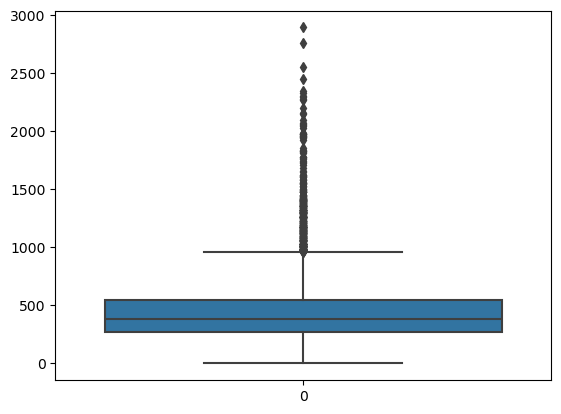

In [123]:
# Checking for outliers on the "target" variable:
sns.boxplot(df["total claim amount"])

In [124]:
# Calculate the exact outliers range:
IQR = abs(np.quantile(df["total claim amount"], .25) - np.quantile(df["total claim amount"], .75)) * 1.5
lower_boundary = np.quantile(df["total claim amount"], .25) - IQR
lower_boundary=lower_boundary.round(2)
upper_boundary = np.quantile(df["total claim amount"], .75) + IQR
upper_boundary=upper_boundary.round(2)
# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-140.63, 960.4)

In [125]:
# Filtiring the values:
df[(df["total claim amount"] < 960.4) | (df["total claim amount"] > -140.63)].sort_values("total claim amount")

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
2334,EY74093,Nevada,5004.14,No,Basic,High School or Below,2011-02-21,Employed,M,86834,...,0,8,Corporate Auto,Corporate L1,Offer4,Agent,0.099007,Four-Door Car,Medsize,2
872,PN21042,Arizona,4538.85,No,Basic,Bachelor,2011-02-17,Employed,M,82297,...,0,1,Personal Auto,Personal L3,Offer1,Call Center,0.382107,Sports Car,Medsize,2
5239,IS30186,California,6186.50,No,Extended,College,2011-01-31,Employed,F,88375,...,0,3,Personal Auto,Personal L2,Offer2,Agent,0.423310,Four-Door Car,Medsize,1
45,HG65722,Oregon,12819.10,No,Premium,Doctor,2011-01-25,Disabled,F,10105,...,3,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize,1
7632,WW74234,Arizona,3969.43,No,Basic,College,2011-02-05,Employed,F,49544,...,0,1,Personal Auto,Personal L3,Offer1,Agent,0.769185,SUV,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,FO35655,Oregon,8672.23,No,Extended,Bachelor,2011-01-14,Unemployed,M,0,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,2345.413441,Luxury SUV,Medsize,1
9049,UZ14076,California,32104.70,No,Premium,High School or Below,2011-02-16,Employed,F,89546,...,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large,2
4930,IV94496,Nevada,43217.22,No,Extended,High School or Below,2011-01-27,Employed,M,51504,...,0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize,1
5074,ZD75163,Nevada,9295.41,No,Premium,High School or Below,2011-02-14,Unemployed,M,0,...,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize,2


In [126]:
# For numerical features we have pearson / spearman correlation measure:
correlations_matrix = df_numerical.corr()
correlations_matrix["total claim amount"].sort_values(ascending=False)

total claim amount               1.000000
monthly premium auto             0.632017
customer lifetime value          0.226451
months since last claim          0.007563
months since policy inception    0.003335
number of policies              -0.002354
number of open complaints       -0.014241
income                          -0.355254
Name: total claim amount, dtype: float64

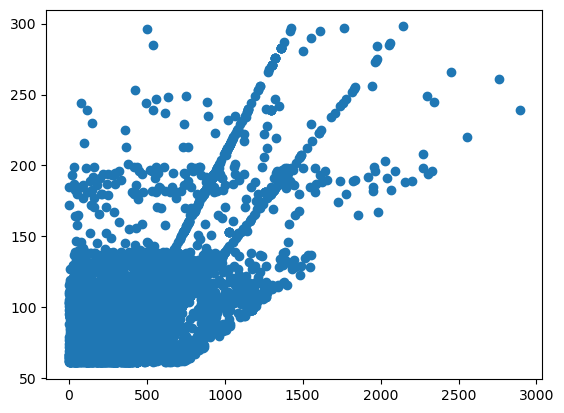

In [127]:
# "Monthly premium auto" has the highest correlation:
plt.scatter(df["total claim amount"], df["monthly premium auto"])

<Axes: xlabel='total claim amount', ylabel='monthly premium auto'>

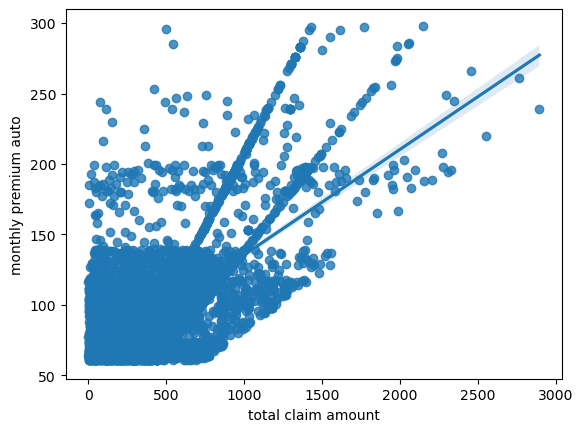

In [128]:
# Create a regression plot to visualize the relationship between two variables: "total claim amount" and "monthly premium auto":
sns.regplot(x=df["total claim amount"], y=df["monthly premium auto"])

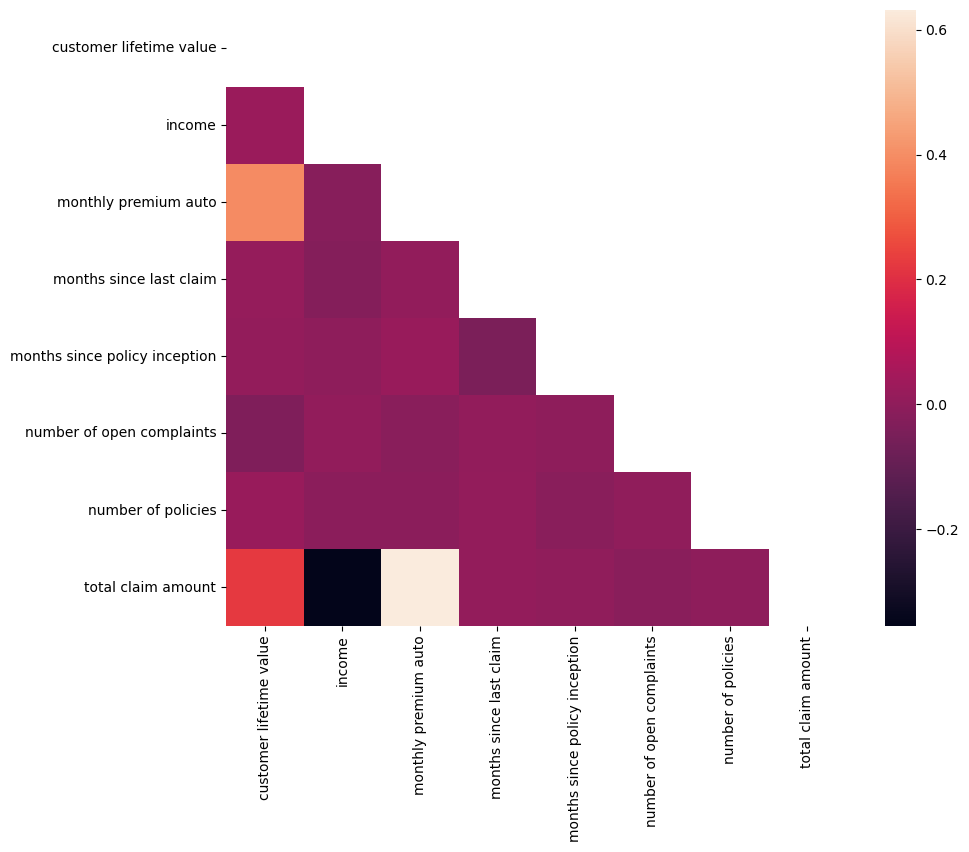

In [129]:
# Create a heatmap to visualize the correlation matrix of numerical variables in the dataset:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask=mask, annot=True, ax=ax,fmt="d")
plt.show()

In [130]:
# Creates a copy of the original DataFrame:
df_final = df.copy()
df_final

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [148]:
# Remove the column "customer":
df_final = df_final.drop(['customer'], axis=1)
df_final

KeyError: "['customer'] not found in axis"

In [149]:
# Create the binary columns for each category in the categorical column:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final

,customer lifetime value,effective to date,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,2763.52,2011-02-24,56274,69,32,5,0,1,384.811147,2,...,False,False,False,False,False,False,False,True,True,False
1,6979.54,2011-01-31,0,94,13,42,0,8,1131.464935,1,...,False,False,False,False,False,False,False,False,True,False
2,12887.43,2011-02-19,48767,108,18,38,0,2,566.472247,2,...,False,False,False,False,False,False,False,True,True,False
3,7645.86,2011-01-20,0,106,18,65,0,7,529.881344,1,...,False,True,False,False,False,True,False,False,True,False
4,2813.69,2011-02-03,43836,73,12,44,0,1,138.130879,2,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.99,2011-02-10,71941,73,18,89,0,2,198.234764,2,...,False,False,True,False,False,False,False,False,True,False
9130,3096.51,2011-02-12,21604,79,14,28,0,1,379.200000,2,...,True,False,False,False,False,False,False,False,True,False
9131,8163.89,2011-02-06,0,85,9,37,3,2,790.784983,2,...,True,False,False,False,False,False,False,False,True,False
9132,7524.44,2011-02-03,21941,96,34,3,0,3,691.200000,2,...,True,False,False,False,False,False,False,False,False,False


In [150]:
# X-y split: here we keep only the data we will use to train the model
X = df_final.drop(["customer lifetime value", "total claim amount", "effective to date", "month"], axis=1)
y = df_final["total claim amount"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_Yes,coverage_Extended,coverage_Premium,education_College,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
434,48567,130,12,15,0,1,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4641,26877,131,5,2,0,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4952,12902,139,3,51,0,1,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
1489,0,121,5,94,0,8,False,True,False,True,...,True,False,False,False,False,False,True,False,True,False
812,70247,83,13,19,1,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,87957,61,31,63,0,2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5191,22520,73,17,64,0,3,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
5390,0,129,13,4,0,7,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
860,0,139,5,56,0,2,True,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [151]:
# Start the scaler object:
scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage:
scaler.fit(X_train)

# Transform training and the testing data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.77
RMSE: 138.19337947401044
MAE: 94.26241023018919


<Axes: xlabel='total claim amount'>

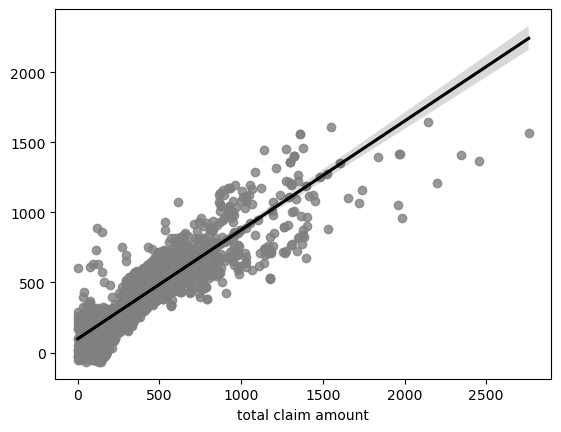

In [153]:
# Get the regression prot from the predictions vs the true values:
sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

In [154]:
# Log scaling - we will see this on unit 4:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)
# it is not possible to get log of 0 or negative numbers, so we had to create the logic above

y_train_scaled

434     6.436150
4641    6.443813
4952    6.503090
1489    6.769872
812     4.954414
          ...   
5734    5.731143
5191    5.859075
5390    6.965621
860     6.503090
7270    5.840686
Name: total claim amount, Length: 6393, dtype: float64

<Axes: xlabel='total claim amount', ylabel='Density'>

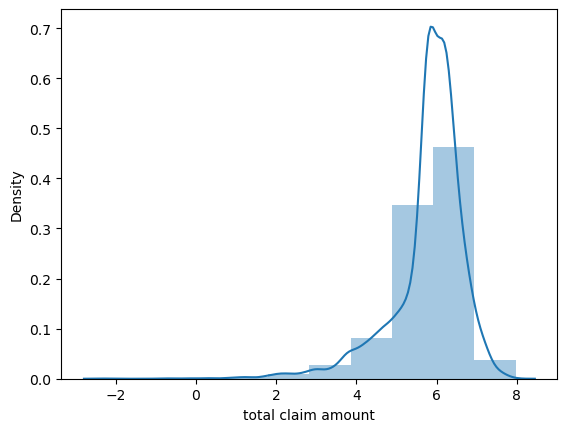

In [155]:
# Look at how log scaling changed the distribution:
sns.distplot(y_train_scaled, bins=10)

<Axes: xlabel='total claim amount', ylabel='Density'>

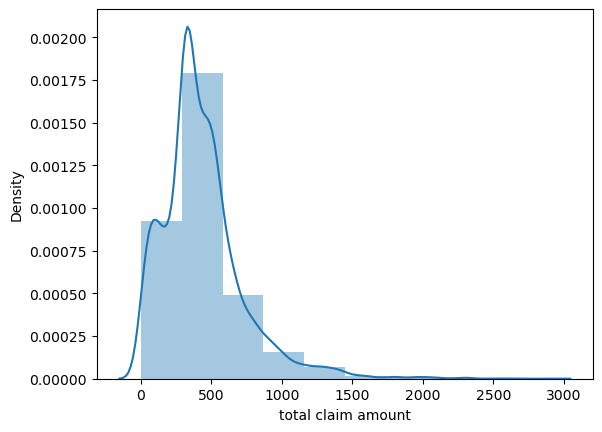

In [156]:
# Compared to what we had before scaling:
sns.distplot(y_train, bins=10) 

In [157]:
# Now let's check the model:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)
predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: 0.73


<Axes: xlabel='total claim amount'>

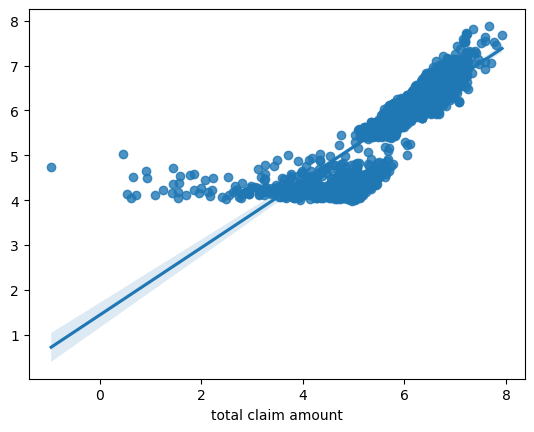

In [158]:
sns.color_palette("colorblind")
sns.regplot(x=y_test_scaled, y=predictions)

In [159]:
result_df = X_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = abs(y_test_scaled - predictions)
result_df.sort_values("error", ascending=False)

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_Yes,coverage_Extended,coverage_Premium,education_College,...,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,target,scaled_target,error
872,82297,116,5,62,0,1,False,False,False,False,...,False,False,False,True,False,True,False,0.382107,-0.962055,5.698422
3881,91193,185,15,75,1,6,False,False,False,False,...,False,True,False,False,False,True,False,1.587888,0.462405,4.563034
664,96263,103,5,5,0,1,False,False,False,False,...,False,False,True,False,False,False,True,1.924709,0.654775,3.866658
3932,0,103,2,75,2,6,False,False,False,False,...,False,False,True,False,False,True,False,2.455033,0.898140,3.748649
1328,23046,65,18,7,3,2,False,False,False,False,...,False,False,False,False,True,False,False,1.687291,0.523124,3.615748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,51584,69,11,98,2,2,False,False,False,False,...,False,False,False,False,True,False,True,368.919773,5.910579,0.000414
8919,87274,73,2,30,1,1,False,False,False,False,...,False,False,False,False,False,True,False,350.400000,5.859075,0.000244
2531,0,74,6,61,0,1,False,False,False,True,...,False,False,False,False,True,True,False,420.765993,6.042077,0.000210
3007,28432,118,1,59,0,2,True,False,False,True,...,False,False,True,False,False,False,True,612.300581,6.417223,0.000161


<Axes: xlabel='target', ylabel='error'>

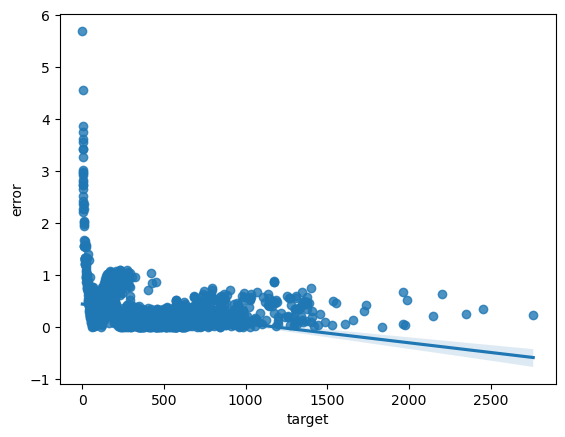

In [160]:
sns.regplot(result_df, x='target', y='error')

In [161]:
# Filter a DataFrame to exclude rows with a "total claim amount" less than or equal to 960.4.
df_no_outliers = df_final[df_final["total claim amount"] > 960.4]
df_no_outliers

,customer lifetime value,effective to date,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
1,6979.54,2011-01-31,0,94,13,42,0,8,1131.464935,1,...,False,False,False,False,False,False,False,False,True,False
73,6781.27,2011-02-04,0,104,30,3,1,5,982.399613,2,...,False,False,False,False,False,False,True,False,True,False
135,4022.96,2011-01-26,0,117,6,1,0,1,975.107098,1,...,False,False,False,False,False,True,False,False,True,False
142,9047.12,2011-01-21,0,127,30,11,0,6,1087.995426,1,...,True,False,False,False,False,False,True,False,True,False
181,16936.27,2011-01-24,39411,217,4,29,2,4,1122.658899,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,32104.70,2011-02-16,89546,266,4,18,1,2,2452.894264,2,...,False,False,False,False,True,False,False,False,False,False
9103,15245.25,2011-01-01,30205,195,24,1,0,4,1329.957905,1,...,False,False,False,False,True,False,False,False,False,False
9107,5619.69,2011-01-26,0,153,25,5,0,1,1027.000029,1,...,False,False,True,False,False,True,False,False,True,False
9109,3622.87,2011-01-25,0,108,23,52,0,1,1254.177129,1,...,True,False,False,False,False,True,False,False,True,False


In [162]:
# Log scaling the numerical variables:
# Disclaimer: for log scaling we don't need the train-test split first, since log transformation does not require any extra information but the number it is scaling

df_no_outliers[df_numerical.columns] = df_no_outliers[df_numerical.columns].applymap(lambda x: np.log(x) if x > 0 else 0) # this logic will work well as long as we don't have negative values
# .applymap() is similar to .apply() but it applies the function on the entire DataFrame

df_no_outliers

,customer lifetime value,effective to date,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
1,8.850738,2011-01-31,0.000000,4.543295,2.564949,3.737670,0.000000,2.079442,7.031268,1,...,False,False,False,False,False,False,False,False,True,False
73,8.821920,2011-02-04,0.000000,4.644391,3.401197,1.098612,0.000000,1.609438,6.889998,2,...,False,False,False,False,False,False,True,False,True,False
135,8.299773,2011-01-26,0.000000,4.762174,1.791759,0.000000,0.000000,0.000000,6.882547,1,...,False,False,False,False,False,True,False,False,True,False
142,9.110202,2011-01-21,0.000000,4.844187,3.401197,2.397895,0.000000,1.791759,6.992092,1,...,True,False,False,False,False,False,True,False,True,False
181,9.737213,2011-01-24,10.581800,5.379897,1.386294,3.367296,0.693147,1.386294,7.023455,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,10.376758,2011-02-16,11.402508,5.583496,1.386294,2.890372,0.000000,0.693147,7.805024,2,...,False,False,False,False,True,False,False,False,False,False
9103,9.632023,2011-01-01,10.315763,5.273000,3.178054,0.000000,0.000000,1.386294,7.192903,1,...,False,False,False,False,True,False,False,False,False,False
9107,8.634032,2011-01-26,0.000000,5.030438,3.218876,1.609438,0.000000,0.000000,6.934397,1,...,False,False,True,False,False,True,False,False,True,False
9109,8.195022,2011-01-25,0.000000,4.682131,3.135494,3.951244,0.000000,0.000000,7.134235,1,...,True,False,False,False,False,True,False,False,True,False


In [163]:
# X-y split: here we keep only the data we will use to train the model
X = df_no_outliers.drop(["effective to date","customer lifetime value", "total claim amount", "month"], axis=1) # check results without the multicolinear columns: "ic1", "ic2", "ic3", "hvp1"
y = df_no_outliers["total claim amount"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Test the model:
predictions = lm.predict(X_test)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 

R2_score: 0.24


<Axes: xlabel='total claim amount'>

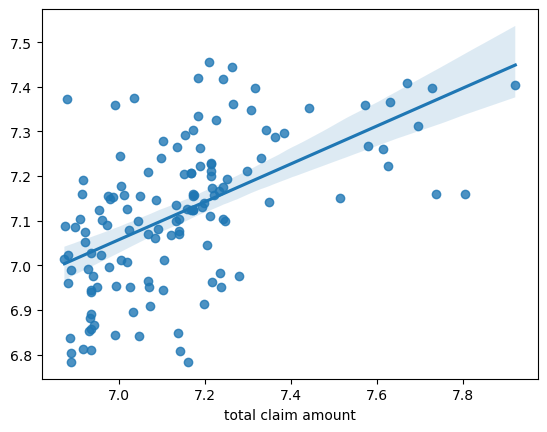

In [164]:
# Create a scatter plot with a regression line.:
sns.regplot(x=y_test, y=predictions)
# We can see here a big prediction error ( the points are far from the regression line).

In [165]:
# Since we scaled the target variable, we need to inverse transform to get the original values in the $ unit:
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 279.7682237713763
MAE: 189.750194547029


In [ ]:
# Using LinearRegression we have got a better R2_score.